In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
#Action Plan: 

#need to get temperature and precipitation data comparison june vs december
#compare  temperature and precipitation in june and decemper

#use measurement class only

#retrieve data from data base [station],[precipitation],[temperature],[date]

#extract month for filtering by june and december

#create 2 data frames from june and december

#use df.describe() on combinced data frames for rain and temperature for june and december

#Get season to season comparison:

##set index to datetime
## set sampling by 1 year
##plot precipitation vs temperature for each season by year

##merge 1-year sampled june w. december
##plot precipitation june vs december for temperature and precipitation



In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine =  create_engine('sqlite:///hawaii.sqlite')


In [7]:
# reflect an existing database into a new model. 
#creates base class to automap schemas in alchemy.like foundation to build on it

Base = automap_base()

# reflect the tables, reflect the scehme of databasis
Base.prepare(engine, reflect = True)

In [8]:
# We can view all of the classes that automap found 
Base.classes.keys()

['measurement', 'station']

In [9]:
Base.classes.values()

[sqlalchemy.ext.automap.measurement, sqlalchemy.ext.automap.station]

In [10]:
# measurement and station are the classes, we dont want to type all the time Base.classes.<name> so we define Name = ....<name>
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
dir(Measurement)

['__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_decl_class_registry',
 '_sa_class_manager',
 '_sa_decl_prepare',
 '_sa_raise_deferred_config',
 'classes',
 'date',
 'id',
 'metadata',
 'prcp',
 'prepare',
 'station',
 'tobs']

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Seson weather analysis

In [13]:
#retriveing data from data bassis
results = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()
print(results)

[('USC00519397', '2010-01-01', 0.08, 65.0), ('USC00519397', '2010-01-02', 0.0, 63.0), ('USC00519397', '2010-01-03', 0.0, 74.0), ('USC00519397', '2010-01-04', 0.0, 76.0), ('USC00519397', '2010-01-06', None, 73.0), ('USC00519397', '2010-01-07', 0.06, 70.0), ('USC00519397', '2010-01-08', 0.0, 64.0), ('USC00519397', '2010-01-09', 0.0, 68.0), ('USC00519397', '2010-01-10', 0.0, 73.0), ('USC00519397', '2010-01-11', 0.01, 64.0), ('USC00519397', '2010-01-12', 0.0, 61.0), ('USC00519397', '2010-01-14', 0.0, 66.0), ('USC00519397', '2010-01-15', 0.0, 65.0), ('USC00519397', '2010-01-16', 0.0, 68.0), ('USC00519397', '2010-01-17', 0.0, 64.0), ('USC00519397', '2010-01-18', 0.0, 72.0), ('USC00519397', '2010-01-19', 0.0, 66.0), ('USC00519397', '2010-01-20', 0.0, 66.0), ('USC00519397', '2010-01-21', 0.0, 69.0), ('USC00519397', '2010-01-22', 0.0, 67.0), ('USC00519397', '2010-01-23', 0.0, 67.0), ('USC00519397', '2010-01-24', 0.01, 71.0), ('USC00519397', '2010-01-25', 0.0, 67.0), ('USC00519397', '2010-01-26'

In [14]:
#inserting the data into dataframe
df2 = pd.DataFrame(results, columns=['Station','date','precipitation','temperature'])
df2

,Station,date,precipitation,temperature
0,USC00519397,2010-01-01,0.08,65.0
1,USC00519397,2010-01-02,0.00,63.0
2,USC00519397,2010-01-03,0.00,74.0
3,USC00519397,2010-01-04,0.00,76.0
4,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71.0
19546,USC00516128,2017-08-20,NaN,78.0
19547,USC00516128,2017-08-21,0.56,76.0
19548,USC00516128,2017-08-22,0.50,76.0


In [15]:
df2['date'] = pd.to_datetime(df2['date'])
df2['Month'] = df2['date'].dt.strftime('%B')
df2

,Station,date,precipitation,temperature,Month
0,USC00519397,2010-01-01,0.08,65.0,January
1,USC00519397,2010-01-02,0.00,63.0,January
2,USC00519397,2010-01-03,0.00,74.0,January
3,USC00519397,2010-01-04,0.00,76.0,January
4,USC00519397,2010-01-06,NaN,73.0,January
...,...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71.0,August
19546,USC00516128,2017-08-20,NaN,78.0,August
19547,USC00516128,2017-08-21,0.56,76.0,August
19548,USC00516128,2017-08-22,0.50,76.0,August


In [16]:
data_june=df2.loc[df2['Month']=='June']

In [17]:
data_december=df2.loc[df2['Month']=='December']
#data_december

In [18]:
data_june.isnull().sum()

Station            0
date               0
precipitation    126
temperature        0
Month              0
dtype: int64

In [19]:
data_december.isnull().sum()

Station            0
date               0
precipitation    112
temperature        0
Month              0
dtype: int64

In [20]:
data_june.describe()

,precipitation,temperature
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [21]:
data_december.describe()

,precipitation,temperature
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


In [22]:
#data_june=data_june=data_june.dropna(), we dont drop nan becasues it will only impact temperatuer which but not
#column of interest percipitation, so it will not improve precipitation but worsend temepratuere analysis

In [23]:
datetime_series = pd.to_datetime(data_june["date"])
datetime_index = pd.DatetimeIndex(datetime_series.values)
data_june_hist=data_june.set_index(datetime_index)
data_june_hist=data_june_hist.resample("Y").mean()
#data_june_hist

In [24]:
datetime_series = pd.to_datetime(data_december["date"])
datetime_index = pd.DatetimeIndex(datetime_series.values)
data_december_hist=data_december.set_index(datetime_index)
data_december_hist=data_december_hist.resample("Y").mean()
#data_december_hist

In [25]:
december_copy=data_december.copy()
june_copy=data_june.copy()

In [26]:
june_copy["year"] = june_copy['date'].dt.year
december_copy['year'] = december_copy['date'].dt.year

In [27]:
both_seasons = pd.merge(june_copy, december_copy, on = 'year', suffixes=['_june','_december'])
both_seasons_by_year = both_seasons.groupby(['year']).mean()
both_seasons_by_year

,precipitation_june,temperature_june,precipitation_december,temperature_december
year,,,,
2010,0.042241,74.925620,0.459087,70.208511
2011,0.240142,73.938326,0.201581,70.820628
2012,0.097062,74.000000,0.089604,71.188073
2013,0.144195,74.599078,0.169014,71.094017
2014,0.124372,75.027907,0.188439,69.896861
2015,0.125160,74.990148,0.169506,73.423913
2016,0.212312,75.175258,0.199494,71.130000


Text(0, 0.5, 'Multi Station Measurements')

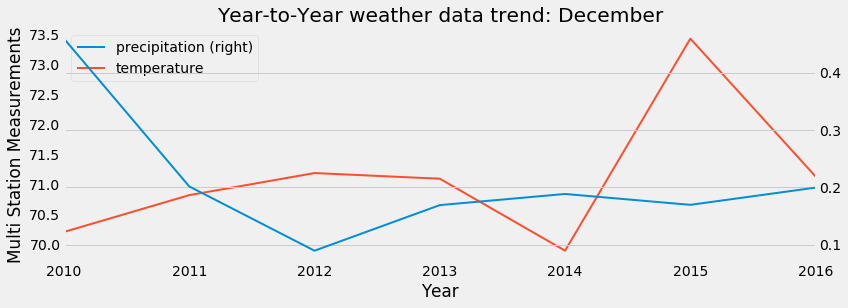

In [28]:
#plotting avg values per season
ax = data_december_hist.plot(secondary_y= 'precipitation', kind = "line", lw=2, markersize=50, figsize = (12,4), title = "Year-to-Year weather data trend: December")
ax.set_xlabel("Year")
ax.set_ylabel("Multi Station Measurements")

In [29]:
#Q: can i just extract data from DB and operate on DF ? 
#for further recommnedations is it ok to just put plots season vs season by year ?

Text(0, 0.5, 'Multi Station Measurements')

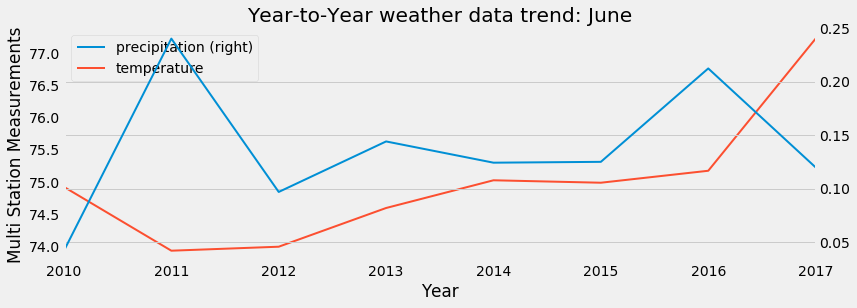

In [30]:
ax = data_june_hist.plot(secondary_y= 'precipitation', kind = "line", lw=2, markersize=50, figsize = (12,4), title = "Year-to-Year weather data trend: June")
ax.set_xlabel("Year")
ax.set_ylabel("Multi Station Measurements")

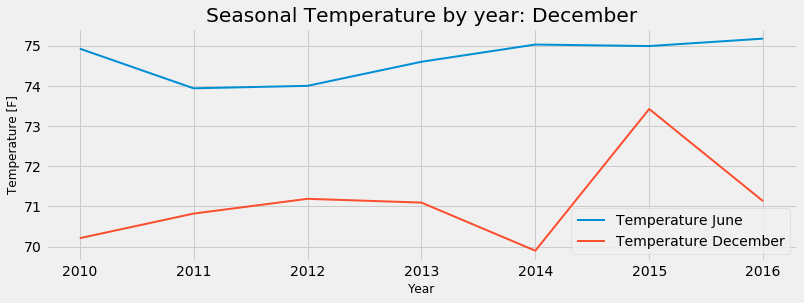

In [31]:
ax = both_seasons_by_year['temperature_june'].plot(lw=2, markersize=50, figsize = (12,4), title = "Seasonal Temperature by year: December")
ax = both_seasons_by_year['temperature_december'].plot(lw=2) 
#ax.set_ylabel('Temperature', fontsize=10);

#plot customization
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature [F]', fontsize=12)
plt.legend(['Temperature June', 'Temperature December'])

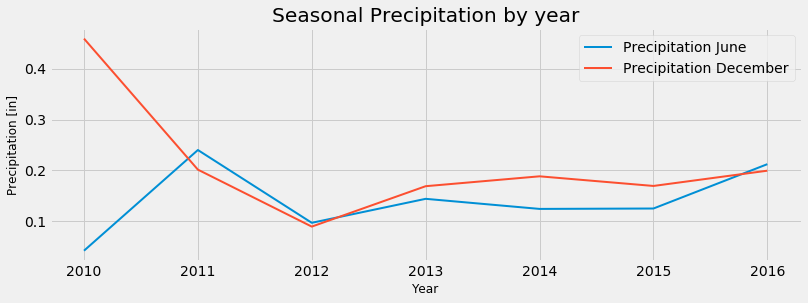

In [44]:
ax = both_seasons_by_year['precipitation_june'].plot(lw=2, markersize=50, figsize = (12,4), title = "Seasonal Precipitation by year")
ax = both_seasons_by_year['precipitation_december'].plot(lw=2) 

#plot customization
plt.xlabel('Year', fontsize=12)
plt.ylabel('Precipitation [in]', fontsize=12)
plt.legend(['Precipitation June', 'Precipitation December'])

In [33]:
#from scipy import stats

Text(0, 0.5, 'Precipitation [in]')

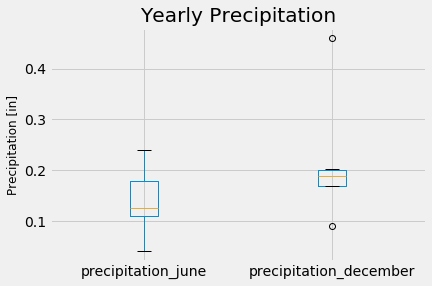

In [43]:
both_seasons_by_year.boxplot(column=['precipitation_june', 'precipitation_december'])
plt.title('Yearly Precipitation')
plt.ylabel('Precipitation [in]', fontsize=12)

Text(0, 0.5, 'Temperature [F]')

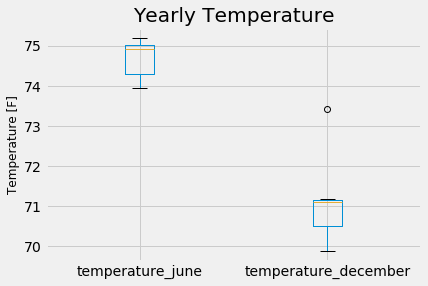

In [41]:
both_seasons_by_year.boxplot(column=['temperature_june', 'temperature_december'])
plt.title('Yearly Temperature')
plt.ylabel('Temperature [F]', fontsize=12)